In [1]:
#下面这行代码，是为了把自己编写的代码文件当作一共模块导入，这里是把Utilities文件夹中的plotting.py文件当作python的模块导入，对应的是下面的from plotting import newfig, savefig。路径要随着不同设备的系统做相应的修改
import sys #导入sys模块。sys模块提供了一些变量和函数，用于与 Python解释器进行交互和访问。例如，sys.path 是一个 Python 在导入模块时会查找的路径列表，sys.argv 是一个包含命令行参数的列表，sys.exit() 函数可以用于退出 Python 程序。导入 sys 模块后，你就可以在你的程序中使用这些变量和函数了。
# sys.path.insert(0, '../../Utilities/') #在 Python的sys.path列表中插入一个新的路径。sys.path是一个 Python 在导入模块时会查找的路径列表。新的路径'../../Utilities/'相对于当前脚本的路径。当你尝试导入一个模块时，Python 会在 sys.path 列表中的路径下查找这个模块。通过在列表开始位置插入一个路径，你可以让 Python 优先在这个路径下查找模块。这在你需要导入自定义模块或者不在 Python 标准库中的模块时非常有用。

import torch
#collections是python一个内置模块，提供了一些有用的数据结构
from collections import OrderedDict  #这个类是字典dict的一个子类，用于创建有序的字典。普通字典中元素顺序是无序的，在OrderedDict中元素的顺序是有序的，元素的顺序是按照它们被添加到字典中的顺序决定的。

from pyDOE import lhs #`pyDOE`是一个Python库，用于设计实验。它提供了一些函数来生成各种设计，如因子设计、拉丁超立方设计等。`lhs`是库中的一个函数，全名为"Latin Hypercube Sampling"，拉丁超立方采样。这是一种统计方法，用于生成一个近似均匀分布的多维样本点集。它在参数空间中生成一个非常均匀的样本，这对于高维数值优化问题非常有用，因为它可以更好地覆盖参数空间。
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #导入了scipy库中的io模块。scipy.io模块包含了一些用于文件输入/输出的函数，例如读取和写入.mat文件（MATLAB格式）
from scipy.interpolate import griddata #`scipy.interpolate`是`scipy`库中的一个模块，提供了许多插值工具，用于在给定的离散数据点之间进行插值和拟合。`griddata`是这个模块中的一个函数，用于在无规则的数据点上进行插值。

import random

import skopt #用于优化问题的库，特别是机器学习中的超参数优化
from distutils.version import LooseVersion #distutils是Python的一个标准库，用于构建和安装Python包。LooseVersion是一个类，用于比较版本号


# from plotting_torch import newfig, savefig #从自定义的plotting_torch.py文件中导入了newfig和savefig函数。这两个函数用于创建和保存图形。这两个函数的定义在plotting_torch.py文件中

from mpl_toolkits.axes_grid1 import make_axes_locatable #`mpl_toolkits.axes_grid1`是`matplotlib`库的一个模块，提供了一些高级的工具来控制matplotlib图形中的坐标轴和颜色条。`make_axes_locatable`是模块中的一个函数，用于创建一个可分割的坐标轴。可以在这个坐标轴的四个方向（上、下、左、右）添加新的坐标轴或颜色条。
import matplotlib.gridspec as gridspec #是`matplotlib`库的一个模块，用于创建一个网格布局来放置子图。在`matplotlib`中可以创建一个或多个子图（subplot），每个子图都有自己的坐标轴，并可以在其中绘制图形。`gridspec`模块提供了一个灵活的方式来创建和放置子图。
import time #一个内置模块，用于处理时间相关的操作。


from tqdm import tqdm #一个快速，可扩展的python进度条库，可以在python长循环中添加一个进度提示信息，用户只需要封装任意的迭代器tqdm(iterator)。

import math
import pandas as pd #pandas用于处理结构化数据
from scipy.io import savemat #导入sys模块。sys模块提供了一些变量和函数，用于与 Python解释器进行交互和访问。例如，sys.path 是一个 Python 在导入模块时会查找的路径列表，sys.argv 是一个包含命令行参数的列表，sys.exit() 函数可以用于退出 Python 程序。导入 sys 模块后，你就可以在你的程序中使用这些变量和函数了。
from mpl_toolkits.mplot3d import Axes3D #`mpl_toolkits.mplot3d`是`matplotlib`库的一个模块，用于创建三维图形。`Axes3D`是`mpl_toolkits.mplot3d`模块中的一个类，用于创建一个三维的坐标轴。可以在这个坐标轴上绘制三维的图形，如曲线、曲面等。



In [2]:
#定义采样函数，目的是采用sampler方法，生成n_samples个在指定空间内的准随机样本，这里space为二维的，因此每个样本都是一个二维点，即n_samples*2的数据点

#共有6种采样器，分别是LHS、Halton、Hammersley、Sobol、Grid和Random，均为均匀采样方法

def caiyang(n_samples, sampler): #接受两个参数，n_samples是样本数量，sampler是采样器名称，是一个字符串
    space = [(-1.0, 1.0), (0.0, 1.0)] #指定样本生成的空间，一个二维空间，第一个维度是-1到1，第二个维度是0到1

    #根据sampler的不同，选择不同的采样器，返回的sampler是一个采样器对象
    if sampler == "LHS": #如果采样器是LHS（拉丁超采样，每个维度都被均匀划分为等量区间，每个样本都是从每个维度的一个区间中随机选取的）
        sampler = skopt.sampler.Lhs(lhs_type="centered", criterion="maximin", iterations=1000) #第一个参数表示如何从每个区间选取样本，这里表示从每个区间的中心选取样本；第二个参数表示如何划分区间，这里表示尽可能使样本之间的最小距离最大；第三个表示通过优化过程得到样本量的迭代次数（即会尝试1000种不同的样本配置，并最终选择质量最好的那个）
    elif sampler == "Halton": #Halton序列是一种低差异序列，用于在高维空间中生成点
        sampler = skopt.sampler.Halton(min_skip=-1, max_skip=-1)  #两个参数用于控制序列的起始点，Halton序列可以通过跳过序列的前几个点来改变序列的七十点。两个参数分别制定了跳过点的最小和最大数量，这里-1表示不跳过任何点
    elif sampler == "Hammersley": #Hammersley序列是一种低差异序列，用于在高维空间中生成点
        sampler = skopt.sampler.Hammersly(min_skip=-1, max_skip=-1) #两个参数用于控制序列的起始点，Hammersley序列可以通过跳过序列的前几个点来改变序列的七十点。两个参数分别制定了跳过点的最小和最大数量，这里-1表示不跳过任何点
    elif sampler == "Sobol":
        # Remove the first point [0, 0, ...] and the second point [0.5, 0.5, ...], which are too special and may cause some error.
        # Sobol采样器的实现有一个问题，即生成的前两个样本点通常不是随机的而是固定的，Sobol序列的前两个点（[0, 0, ...]和[0.5, 0.5, ...]）在许多情况下都被认为是“特殊”的点，可能会对某些计算产生不利影响。因此设置跳过前两个点，而且skopt库在0.9版本号取消了max/min_skip参数，所以需要根据skopt的版本号来选择不同的参数
        if LooseVersion(skopt.__version__) < LooseVersion("0.9"): #先检查skopt的版本是否大于0.9,若小于
            sampler = skopt.sampler.Sobol(min_skip=2, max_skip=2, randomize=False) #则使用Sobol采样器，min_skip和max_skip表示跳过的点的数量，这里表示跳过前两个点，randomize表示是否随机化
        else: #若skopt的版本大于0.9
            sampler = skopt.sampler.Sobol(skip=0, randomize=False) #则使用Sobol采样器，skip表示跳过的点的数量，这里表示不跳过任何点，randomize表示是否随机化 
            return np.array(sampler.generate(space, n_samples + 2)[2:]) #生成n_samples+2个样本，然后返回除了前两个样本之外的所有样本，也就是返回n_samples个样本，每个样本都是一个二维点，且范围在指定的空间space里面
    elif sampler == "Grid":
        x_min, x_max = space[1]
        t_min, t_max = space[0]
        
        # 计算每个维度的网格大小
        x_grid_size = (x_max - x_min) / (n_samples // int(np.sqrt(n_samples)) - 1) # x维度上（纵轴），每行有10个点
        t_grid_size = (t_max - t_min) / int(np.sqrt(n_samples))  # 
        
        # 生成等距均匀网格采样点
        samples = []
        for i in range(n_samples // int(np.sqrt(n_samples))):
            for j in range(int(np.sqrt(n_samples))):
                # 计算每个网格单元的中心点
                x = x_min + i * x_grid_size
                t = t_min + j * t_grid_size
                samples.append([t, x])
        
        return np.array(samples)
    
    elif sampler == "Random":
        # 从space中提取出x_min, x_max, t_min, t_max
        x_min, x_max = space[1]
        t_min, t_max = space[0]

        # 生成x和t的随机数
        x = np.random.rand(n_samples, 1) * (x_max - x_min) + x_min
        t = np.random.rand(n_samples, 1) * (t_max - t_min) + t_min

        # 将x和t合并为一个(n_samples, 2)的数组
        samples = np.hstack((t, x))
        return samples #生成一个形状为(n_samples, 2)的随机数组



    return np.array(sampler.generate(space, n_samples)) #生成n_samples个样本，每个样本都是一个二维点，且范围在指定的空间space里面（n_samples*2）

In [3]:
def Cov_cross_matrix(X1, X2, gamma):
    n_1 = X1.shape[0]
    n_2 = X2.shape[0]
    Cov_X1_X2 = np.zeros(shape=(n_1, n_2), dtype=float)
    for i in tqdm(range(n_1), desc='cross'):
        for j in range(n_2):
            xi = X1[i:i+1,:]
            xj = X2[j:j+1,:]
            dij = np.sum((xi-xj)**2)
            Cov_X1_X2[i][j] = np.exp(-gamma*dij)
    return Cov_X1_X2

def Cov_cross_matrix_gpu(X1, X2, gamma):
    # 将输入数据转换为 PyTorch 张量，并移动到 GPU 上
    X1 = torch.tensor(X1, dtype=torch.float64).cuda()
    X2 = torch.tensor(X2, dtype=torch.float64).cuda()
    gamma = torch.tensor(gamma, dtype=torch.float64).cuda()

    n_1 = X1.shape[0]
    n_2 = X2.shape[0]
    Cov_X1_X2 = torch.zeros((n_1, n_2), dtype=torch.float64).cuda()

    for i in tqdm(range(n_1), desc='cross'):
        xi = X1[i:i+1, :]
        dij = torch.sum((xi - X2) ** 2, dim=1)
        Cov_X1_X2[i, :] = torch.exp(-gamma * dij)

    # 将结果从 GPU 移动到 CPU，并转换为 NumPy 数组
    return Cov_X1_X2.cpu().numpy()

In [4]:
past = caiyang(1000,"LHS")
new = caiyang(1500,"LHS")
print(past.dtype)

float64


In [5]:
# past = torch.rand(150, 2)
# new = torch.rand(500,2)

In [6]:
start_time = time.time()

a = Cov_cross_matrix(past,new,5)

# 记录结束时间
end_time = time.time()

# 计算运行时间
elapsed_time = end_time - start_time
print(f"函数运行时间: {elapsed_time} 秒")

cross:   0%|          | 0/1000 [00:00<?, ?it/s]

cross: 100%|██████████| 1000/1000 [00:09<00:00, 103.92it/s]

函数运行时间: 9.626532316207886 秒


In [7]:
start_time = time.time()

b = Cov_cross_matrix_gpu(past,new,5)

# 记录结束时间
end_time = time.time()

# 计算运行时间
elapsed_time = end_time - start_time
print(f"函数运行时间: {elapsed_time} 秒")

cross: 100%|██████████| 1000/1000 [00:00<00:00, 2891.82it/s]

函数运行时间: 0.5249025821685791 秒


In [8]:
print(a)
print(b)
print(a==b)
x=a==b
print(x.shape)

[[1.16884509e-02 6.18765889e-03 9.92360855e-01 ... 2.45105029e-01
  8.77553659e-03 1.46940621e-02]
 [1.42117334e-02 1.32999248e-01 2.97255927e-01 ... 5.16567121e-02
  1.70628370e-01 1.57041012e-03]
 [3.37950582e-02 7.77396208e-01 1.48010798e-02 ... 3.27546082e-04
  8.25697033e-01 1.79170095e-06]
 ...
 [3.19531092e-01 3.03220996e-02 2.97434334e-01 ... 4.31167650e-03
  3.57096604e-02 3.71572443e-05]
 [6.84235262e-07 6.14832040e-08 2.59245434e-02 ... 1.56633728e-01
  1.17994948e-07 1.41781453e-01]
 [7.24381709e-07 2.94844284e-07 4.30499100e-02 ... 4.24854521e-01
  5.66867246e-07 4.52751529e-01]]
[[1.16884509e-02 6.18765889e-03 9.92360855e-01 ... 2.45105029e-01
  8.77553659e-03 1.46940621e-02]
 [1.42117334e-02 1.32999248e-01 2.97255927e-01 ... 5.16567121e-02
  1.70628370e-01 1.57041012e-03]
 [3.37950582e-02 7.77396208e-01 1.48010798e-02 ... 3.27546082e-04
  8.25697033e-01 1.79170095e-06]
 ...
 [3.19531092e-01 3.03220996e-02 2.97434334e-01 ... 4.31167650e-03
  3.57096604e-02 3.71572443e-05]

(1000, 1500)


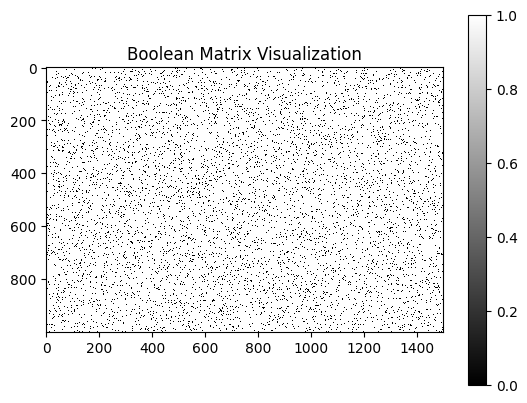

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# # 示例布尔矩阵
# x = np.array([
#     [True, False, True],
#     [False, True, False],
#     [True, True, False]
# ])
print(x.shape)
# 将布尔矩阵转换为整数矩阵（True -> 1, False -> 0）
int_matrix = x.astype(int)

# 使用 matplotlib 的 imshow 函数来可视化矩阵
plt.imshow(int_matrix, cmap='gray', interpolation='none')

# 添加颜色条
plt.colorbar()

# 添加标题
plt.title('Boolean Matrix Visualization')

# 显示图像
plt.show()

In [10]:
def Cov_matrix_gpu(X, gamma):
    # 将输入数据转换为 PyTorch 张量，并移动到 GPU 上
    X = torch.tensor(X, dtype=torch.float64).cuda()
    gamma = torch.tensor(gamma, dtype=torch.float64).cuda()

    n = X.shape[0]
    Cov_x_x = torch.zeros((n, n), dtype=torch.float64).cuda()

    for i in tqdm(range(n), desc="ncross"):
        xi = X[i:i+1, :]
        dij = torch.sum((xi - X) ** 2, dim=1)
        Cov_x_x[i, :] = torch.exp(-gamma * dij)

    # 将结果从 GPU 移动到 CPU，并转换为 NumPy 数组
    return Cov_x_x.cpu().numpy()

def Cov_matrix(X, gamma):
    n = X.shape[0]
    Cov_x_x = np.zeros(shape=(n,n), dtype=float)
    # for i in range(n):
    for i in tqdm(range(n), desc="ncross"):
        for j in range(n):
            xi = X[i:i+1,:]
            xj = X[j:j+1,:]
            dij = np.sum((xi-xj)**2)
            Cov_x_x[i][j] = np.exp(-gamma*dij)
    return Cov_x_x

In [11]:
c = Cov_matrix(past, 5)
d = Cov_matrix_gpu(past,5)

ncross: 100%|██████████| 1000/1000 [00:00<00:00, 3461.20it/s]


In [12]:
print(c)
print(d)
print(c==d)

[[1.00000000e+00 2.52263778e-01 1.03587366e-02 ... 2.67386527e-01
  3.59169841e-02 5.71772035e-02]
 [2.52263778e-01 1.00000000e+00 2.90589111e-01 ... 7.16343909e-02
  3.10817386e-04 1.44217917e-03]
 [1.03587366e-02 2.90589111e-01 1.00000000e+00 ... 1.66173990e-02
  2.22798068e-07 1.51981035e-06]
 ...
 [2.67386527e-01 7.16343909e-02 1.66173990e-02 ... 1.00000000e+00
  6.76157176e-04 6.13935920e-04]
 [3.59169841e-02 3.10817386e-04 2.22798068e-07 ... 6.76157176e-04
  1.00000000e+00 7.61408707e-01]
 [5.71772035e-02 1.44217917e-03 1.51981035e-06 ... 6.13935920e-04
  7.61408707e-01 1.00000000e+00]]
[[1.00000000e+00 2.52263778e-01 1.03587366e-02 ... 2.67386527e-01
  3.59169841e-02 5.71772035e-02]
 [2.52263778e-01 1.00000000e+00 2.90589111e-01 ... 7.16343909e-02
  3.10817386e-04 1.44217917e-03]
 [1.03587366e-02 2.90589111e-01 1.00000000e+00 ... 1.66173990e-02
  2.22798068e-07 1.51981035e-06]
 ...
 [2.67386527e-01 7.16343909e-02 1.66173990e-02 ... 1.00000000e+00
  6.76157176e-04 6.13935920e-04]

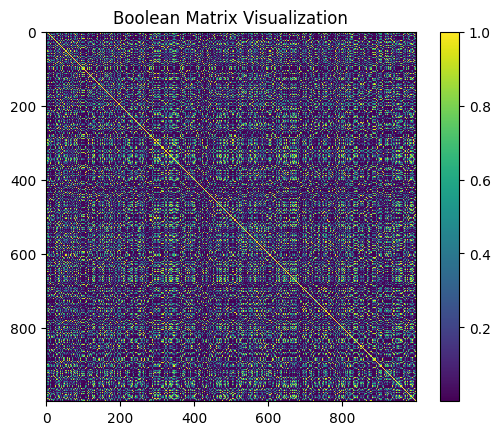

In [13]:
# 使用 matplotlib 的 imshow 函数来可视化矩阵
plt.imshow(c, interpolation='none')

# 添加颜色条
plt.colorbar()

# 添加标题
plt.title('Boolean Matrix Visualization')

# 显示图像
plt.show()

In [14]:
print(np.linalg.det(c))

0.0


In [15]:
def calculate_inverse(Matrix, xishu=100000000):
    rho_orig = Matrix #X（训练点的高斯过程层的常规输出）的协方差矩阵Cov_X_X，将其赋值给rho_orig
    rho = rho_orig*xishu # 将X（训练点的高斯过程层的常规输出）的协方差矩阵Cov_X_X（现在是rho_orig）放大xishu倍，得到rho
    u, s, v = np.linalg.svd(rho) #对放大后的协方差矩阵rho进行奇异值分解，得到矩阵u，奇异值向量s和矩阵v，具体rho = u * np.diag(s) * v.T
    inv_s=np.linalg.inv(np.diag(s)) #计算奇异值向量s对角矩阵的逆矩阵inv_s
    t1= np.matmul(v.T, inv_s) #将矩阵v的转置与逆奇异值矩阵inv_s相乘，得到中间结果 t1
    t2= np.matmul(t1, u.T) #将中间结果t1与矩阵u的转置相乘，得到中间结果t2
    # Check whether the obtained inverse matrix is correct. If it is the identity matrix, it means there is no problem.
    t3= np.matmul(t2, rho) #将中间结果t2与矩阵rho相乘，得到结果t3。如果t2是rho的正确逆矩阵，那么t3应该是一个单位矩阵（即对角线元素为1，其余元素为0）
    # Inverse of covariance matrix
    inv_rho = t2*xishu  #将中间结果t2的每个元素乘以放大常数xishu，得到原始协方差矩阵rho_orig（即X（训练点的高斯过程层的常规输出）的协方差矩阵Cov_X_X）的逆矩阵 inv_rho
    return inv_rho

def calculate_inverse_with_regularization_gpu(Matrix, epsilon=1e-10):
    rho_orig = torch.tensor(Matrix, dtype=torch.float64).cuda()
    rho_reg = rho_orig + epsilon * torch.eye(rho_orig.shape[0], dtype=torch.float64).cuda()
    inv_rho = torch.inverse(rho_reg)
    return inv_rho.cpu().numpy()

def calculate_pseudo_inverse_gpu(Matrix):
    rho_orig = torch.tensor(Matrix, dtype=torch.float64).cuda()
    pseudo_inv_rho = torch.linalg.pinv(rho_orig)
    return pseudo_inv_rho.cpu().numpy()

In [19]:
def generate_singular_matrix(size):
    # 生成一个对角线元素均为 1 的矩阵
    matrix = np.eye(size)
    
    # 将矩阵的非对角线元素随机化，使其在 0 到 1 之间
    for i in range(size):
        for j in range(size):
            if i != j:
                matrix[i, j] = np.random.rand()
    
    # 使矩阵变得奇异：将最后一行设置为第一行的线性组合
    matrix[-1] = matrix[0] * 0.5 + matrix[1] * 0.5
    
    return matrix

# 示例：生成一个 5x5 的奇异矩阵
singular_matrix = generate_singular_matrix(1000)

start_time = time.time()

c_1 = calculate_inverse(c)

# 记录结束时间
end_time = time.time()
print(end_time-start_time)
start_time = time.time()

c_2 = calculate_inverse_with_regularization_gpu(c)

# 记录结束时间
end_time = time.time()
print(end_time-start_time)

start_time = time.time()

c_3 = calculate_pseudo_inverse_gpu(c)

# 记录结束时间
end_time = time.time()
print(end_time-start_time)

19.32346773147583
2.970400810241699
244.20182347297668


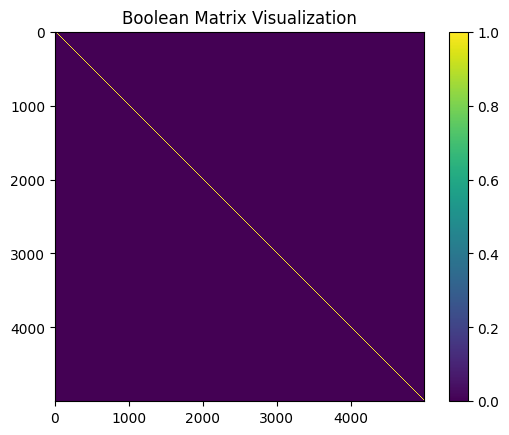

In [17]:
# 使用 matplotlib 的 imshow 函数来可视化矩阵
plt.imshow(np.matmul(singular_matrix), interpolation='none')

# 添加颜色条
plt.colorbar()

# 添加标题
plt.title('Boolean Matrix Visualization')

# 显示图像
plt.show()

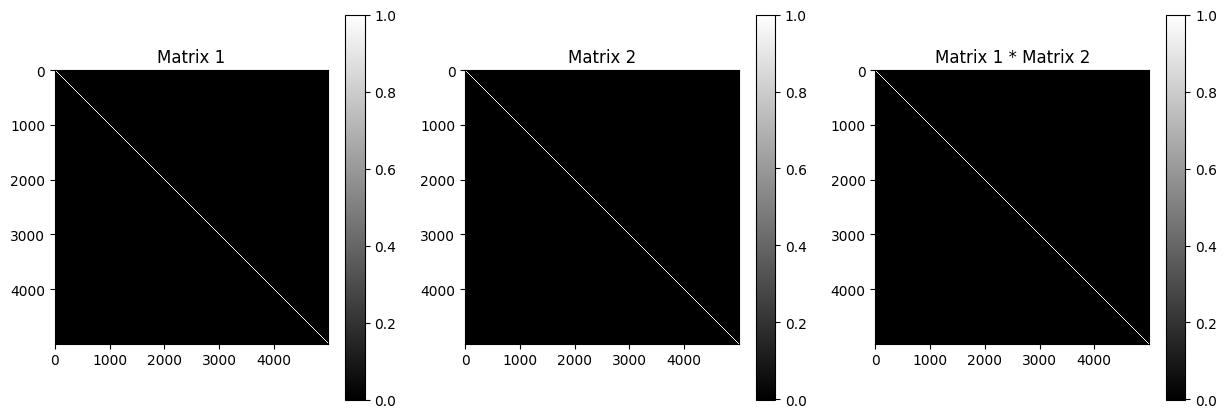

In [18]:
# 创建一个包含三个子图的图形
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# 第一个子图
im1 = axs[0].imshow(np.matmul(c,c_1), cmap='gray', interpolation='none')
axs[0].set_title('Matrix 1')
fig.colorbar(im1, ax=axs[0])

# 第二个子图
im2 = axs[1].imshow(np.matmul(c,c_2), cmap='gray', interpolation='none')
axs[1].set_title('Matrix 2')
fig.colorbar(im2, ax=axs[1])

# 第三个子图
im3 = axs[2].imshow(np.matmul(c,c_3), cmap='gray', interpolation='none')
axs[2].set_title('Matrix 1 * Matrix 2')
fig.colorbar(im3, ax=axs[2])

# 显示图像
plt.show()